# Carga de datos


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('../datasets/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
df = df.rename(columns={'target':'HeartDisease'})
df.HeartDisease = df.HeartDisease.apply(lambda x: 'yes' if x == 0 else ('no' if x ==1 else 'nan'))
df.HeartDisease.describe()


count     303
unique      2
top        no
freq      165
Name: HeartDisease, dtype: object

In [61]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,no
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Conocimiento de los datos


## Atributo age


In [62]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

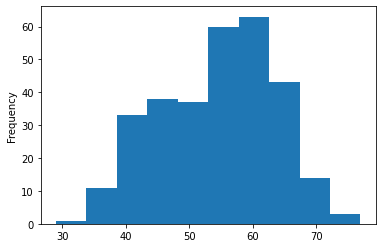

In [63]:
df['age'].plot(kind='hist', xlabel='age', ylabel='Frecuencia')

<AxesSubplot:xlabel='HeartDisease', ylabel='age'>

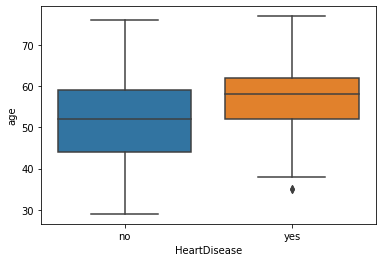

In [64]:
sns.boxplot(data=df[df.age.notna()], x='HeartDisease', y='age')

<AxesSubplot:xlabel='age'>

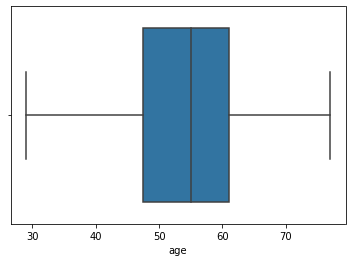

In [65]:
sns.boxplot(data=df[df.age.notna()], x='age')

## Atributo sex

<AxesSubplot:xlabel='sex', ylabel='Frecuencia'>

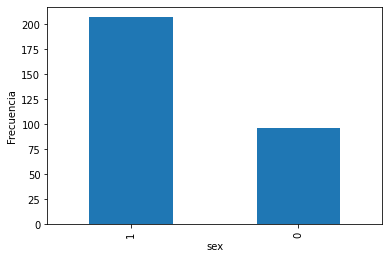

In [66]:
df['sex'].value_counts().plot(kind='bar', xlabel='sex', ylabel='Frecuencia')

## Atributo trestbps
Resting blood pressure. Presión de la sangre en reposo en [mm Hg] al momento de admitirlo en el hospital.

In [67]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<AxesSubplot:ylabel='Frequency'>

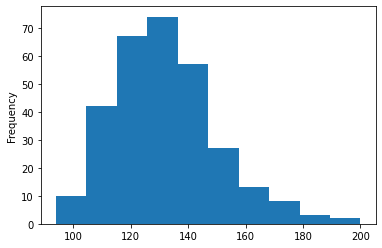

In [68]:
df['trestbps'].plot(kind='hist', xlabel='trestbps', ylabel='Frecuencia')

<AxesSubplot:xlabel='trestbps'>

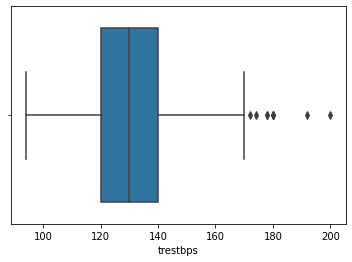

In [69]:
sns.boxplot(data=df, x='trestbps')

In [70]:
# Valores que exeden 3 desviaciones estandar
mean = df.trestbps.mean()
std = df.trestbps.std()
[x for x in df.trestbps if ((x > mean + 3 * std) or (x < mean - 3 * std)) ]

[200, 192]

## Atributo cp


In [71]:
df['cp'].describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [72]:
len(pd.unique(df['cp'])) # Valores unicos

4

<AxesSubplot:xlabel='cp', ylabel='Frecuencia'>

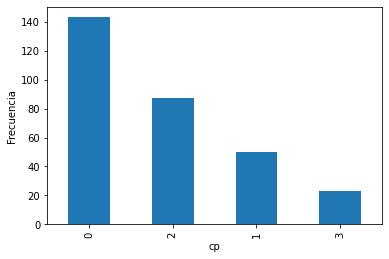

In [73]:
df['cp'].value_counts().plot(kind='bar', xlabel='cp', ylabel='Frecuencia')

## Atributo thalach
Maximun hear rate ahieved


In [74]:
len(pd.unique(df['thalach']))

91

In [75]:
df['thalach'].describe()


count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

<AxesSubplot:ylabel='Frequency'>

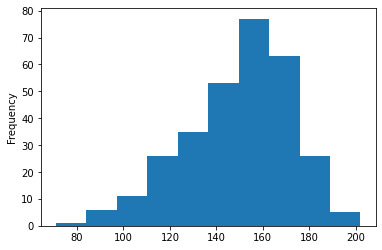

In [76]:
df['thalach'].plot(kind='hist', xlabel='thalach', ylabel='Frecuencia')

<AxesSubplot:xlabel='thalach', ylabel='Count'>

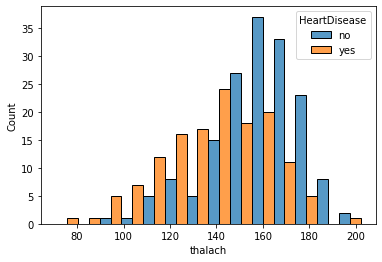

In [77]:
sns.histplot(data=df, x='thalach', hue='HeartDisease', multiple="dodge")

( HeartDisease: 1 = No heart dissease, 0 = heart dissease)

Podemos observar que si el paciente presenta un alto ritmo cardiaco (mayor de 150bpm) las posibilidades de que sufra una cardiopatía disminuyen. La mayoría de los casos de cardiopatía se da cuando el paciente presenta un ritmo cardíaco menor a 140bpm

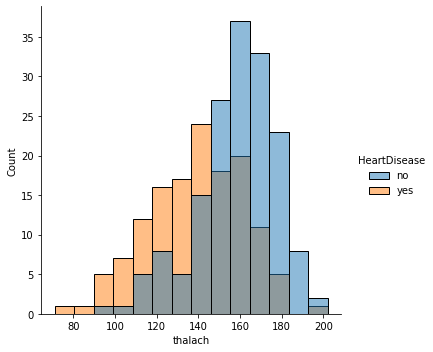

In [78]:
sns.displot(data=df, x='thalach', hue='HeartDisease')

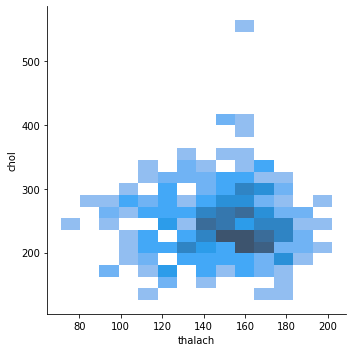

In [79]:
sns.displot(data=df, x="thalach", y="chol")

<AxesSubplot:xlabel='HeartDisease', ylabel='thalach'>

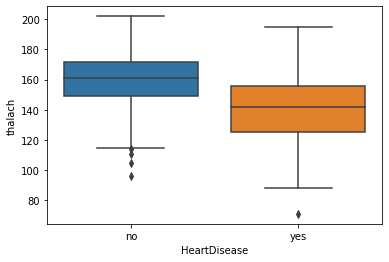

In [80]:
sns.boxplot(data=df[df.thalach.notna()], x='HeartDisease', y='thalach')

In [81]:
[x for x in df.thalach if x <= 80 ]

[71]

## Atributo chol

<AxesSubplot:xlabel='chol'>

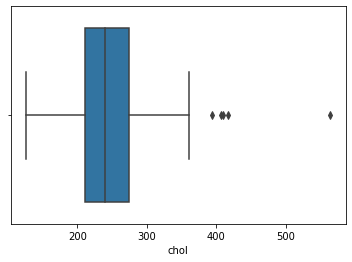

In [82]:
sns.boxplot(data=df, x='chol')

## Atributo oldpeak 
ST depression induced by exercise relative to rest

In [83]:
df.oldpeak.describe().transpose()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [84]:
df.oldpeak.median()

0.8

In [85]:
df.oldpeak.mode()

0    0.0
dtype: float64

<AxesSubplot:ylabel='Frequency'>

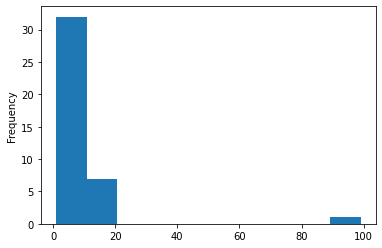

In [86]:
df.oldpeak.value_counts().plot(kind='hist', xlabel='oldpeak', ylabel='Frecuencia')

<AxesSubplot:xlabel='oldpeak'>

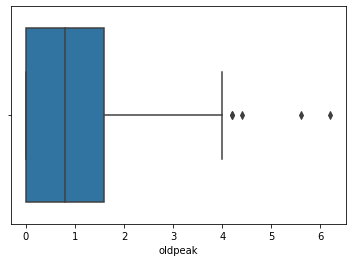

In [87]:
sns.boxplot(data=df[df.age.notna()], x='oldpeak')

Podemos obervar varias anomalias en los datos, lo que podría indicar una mala carga de datos o una manipulación de los mismos.

In [88]:
# Valores que exeden 3 desviaciones estandar
mean = df.oldpeak.mean()
std = df.oldpeak.std()
[x for x in df.oldpeak if ((x > mean + 3 * std) or (x < mean - 3 * std)) ]

[6.2, 5.6]

## Atributo ca
number of major vessels (0-3) colored by flourosopy

<AxesSubplot:xlabel='ca', ylabel='Frecuencia'>

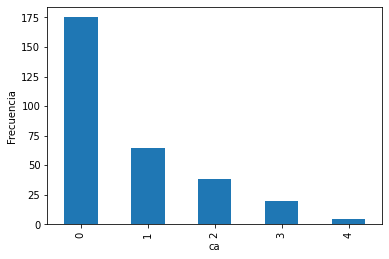

In [89]:
df.ca.value_counts().plot(kind='bar', xlabel='ca', ylabel='Frecuencia')

## Atributo restcg


<AxesSubplot:xlabel='restecg', ylabel='Count'>

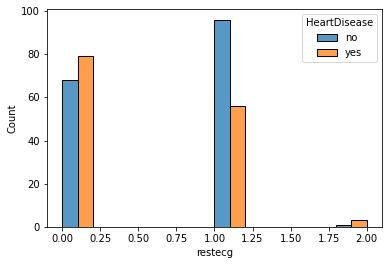

In [90]:
sns.histplot(data=df, x='restecg', hue='HeartDisease', multiple="dodge")

## Atributo slope


Pendiente del pico de ejercicio de ST segment de un electrocardiograma.

In [91]:
df['ca'].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64

In [92]:
len(pd.unique(df['slope']))

3

In [93]:
pd.unique(df['slope'])

array([0, 2, 1])

<AxesSubplot:xlabel='slope', ylabel='Frecuencia'>

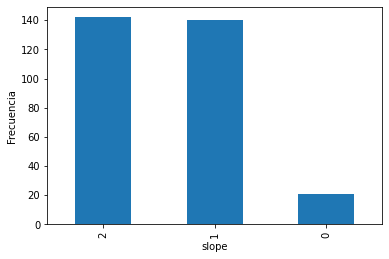

In [94]:
df['slope'].value_counts().plot(kind='bar', xlabel='slope', ylabel='Frecuencia')

<AxesSubplot:xlabel='slope', ylabel='Count'>

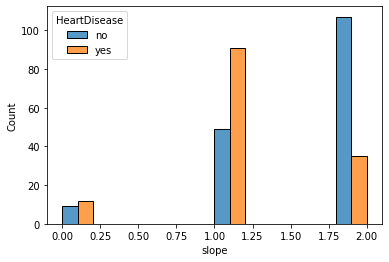

In [95]:
sns.histplot(data=df, x='slope', hue='HeartDisease', multiple="dodge")

(HeartDisease: 1 = No heart dissease, 0 = heart dissease)

Podemos observar que cuando el paciente presenta un slope de 1 hay mas probabilidades de sufrir un infarto. Mientras que en el caso de presentar 0 la diferencia no es significativa.
En el caso de presentar un slope de 2

## Atributo thal
(1 = fixed defect; 2 = normal; 3 = reversable defect)

In [96]:
df['thal'].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

In [97]:
len(pd.unique(df['thal']))

4

In [98]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [99]:
pd.unique(df['thal'])

array([1, 2, 3, 0])

<AxesSubplot:xlabel='thal', ylabel='Frecuencia'>

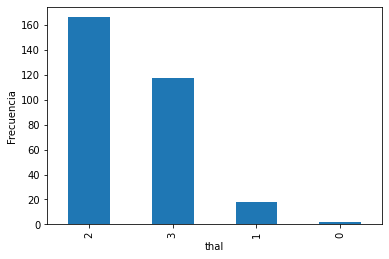

In [100]:
df['thal'].value_counts().plot(kind='bar', xlabel='thal', ylabel='Frecuencia')

<AxesSubplot:xlabel='thal', ylabel='Count'>

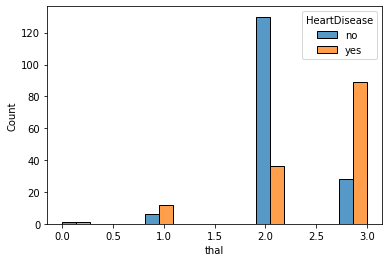

In [101]:
sns.histplot(data=df, x='thal', hue='HeartDisease', multiple="dodge")

(HeartDisease: 1 = No heart dissease, 0 = heart dissease) 
Podemos ver que para los pacientes que se ha detectado que tienen un defecto (thal 0 o 1) se han detectado un número mayor de casos de infarto. Mientras que los pacientes que no tienen defecto (thal 2) en su mayoria no han tenido infartos.
[link text](https://)

## Atributo fbs
Fasting blood sugar. 1 si > 120 mg/dl, 0 en otro caso


<AxesSubplot:xlabel='fbs', ylabel='Frecuencia'>

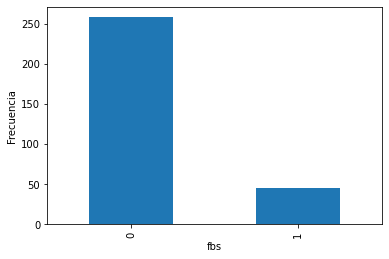

In [102]:
df['fbs'].value_counts().plot(kind='bar', xlabel='fbs', ylabel='Frecuencia')

<AxesSubplot:xlabel='fbs', ylabel='fbs'>

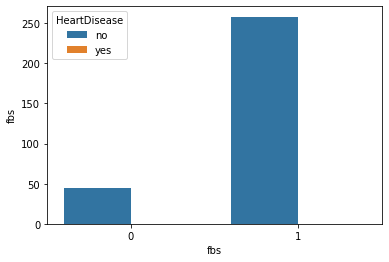

In [103]:
sns.barplot(data=df, x='fbs', hue='HeartDisease', y=df['fbs'].value_counts())

In [104]:
df['fbs'].value_counts()


0    258
1     45
Name: fbs, dtype: int64

## Atributo exang
Excercise induced angina
1 = yes
0 = no

<AxesSubplot:xlabel='exang', ylabel='Frecuencia'>

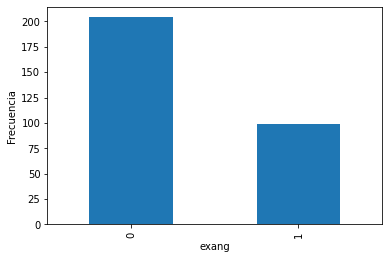

In [105]:
df['exang'].value_counts().plot(kind='bar', xlabel='exang', ylabel='Frecuencia')

## Atributo HeartDisease
(0: Heart disease; 1: No Heart disease)


In [106]:
df['HeartDisease'].value_counts()

no     165
yes    138
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='Frecuencia'>

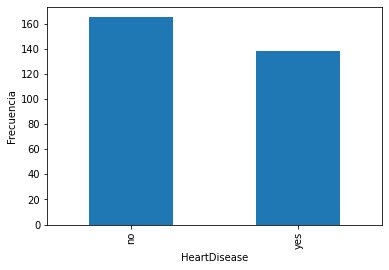

In [107]:
df['HeartDisease'].value_counts().plot(kind='bar', xlabel='HeartDisease', ylabel='Frecuencia')

# Preparación de los datos



In [108]:
#Eliminar duplicados
df = df.drop_duplicates(keep='first', inplace=False)

In [109]:
# Eliminamos los valores de ca que estan fuera del dominio
# y su cantidad no es representativa
valores_aceptados = [0,1,2,3]
df = df[df.ca.isin(valores_aceptados)]
df.ca.value_counts()

0    175
1     65
2     38
3     20
Name: ca, dtype: int64

In [110]:
valores_aceptados = [1,2,3]
df = df[df.thal.isin(valores_aceptados)]
df.thal.value_counts()

2    163
3    115
1     18
Name: thal, dtype: int64

# Modelado: Árbol de clasificación



## Árbol de decision con todos los atributos






In [111]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_validate

## Entrenamiento del modelo

In [112]:
predict = df
# predictores = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
# 'exang', 'oldpeak', 'slope', 'ca', 'thal']
predictores = ['sex','ca','thal']
#Eliminadas chol, fbs, slope, cp, trestbps, restecg, thalach, age, oldpeak, sex

X = df[predictores]
y = df.HeartDisease


## Precisión con kfolds
classifier = tree.DecisionTreeClassifier(criterion="entropy")
result = cross_val_score(classifier, X, y , cv = 20)
print("Avg accuracy: %.3f with std: %.3f" % (result.mean(),result.std()))

Avg accuracy: 0.815 with std: 0.119


## Evaluación del modelo

<AxesSubplot:>

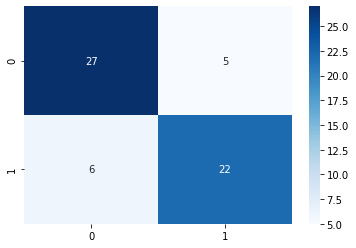

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
classifier.fit(X_train,y_train)
# Test model
y_pred = classifier.predict(X_test)
# Get confusion matrix
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot=True, cmap='Blues')

In [114]:
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.8166666666666667


In [115]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.82      0.84      0.83        32
         yes       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60



## Árbol de decision con 5 atributos


### Entrenamiento del modelo


In [116]:
predict = df
predictores = ['age', 'thalach', 'fbs', 'chol','ca']

X = df[predictores]
y = df.HeartDisease



## Precisión con kfolds
classifier = tree.DecisionTreeClassifier(criterion="entropy")
result = cross_val_score(classifier, X, y , cv = 10)
print("Avg accuracy: %.3f with std: %.3f" % (result.mean(),result.std()))

Avg accuracy: 0.652 with std: 0.070


### Evaluación del modelo


<AxesSubplot:>

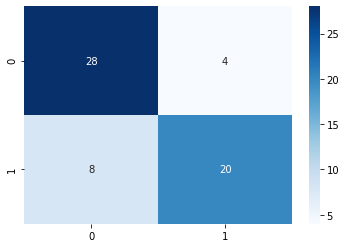

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
classifier.fit(X_train,y_train)
# Test model
y_pred = classifier.predict(X_test)
# Get confusion matrix
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot=True, cmap='Blues')

In [118]:
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.8


In [119]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.78      0.88      0.82        32
         yes       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60



## Árbol de decisión con


In [120]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease'],
      dtype='object')

### Entrenamiento del modelo FALTA ELEGIR PREDICTORES

In [121]:
predict = df
predictores = ['age']
X = df[predictores]
y = df.HeartDisease

# Split dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Choose model with default parameters
classifier = tree.DecisionTreeClassifier()
# Train model with train dataset
classifier = classifier.fit(X_train, y_train)

### Evaluación del modelo

<AxesSubplot:>

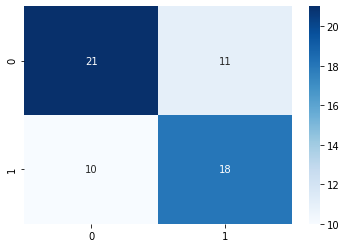

In [122]:
# Test model
y_pred = classifier.predict(X_test)
# Get confusion matrix
mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot=True, cmap='Blues')

In [123]:
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.65


In [124]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.68      0.66      0.67        32
         yes       0.62      0.64      0.63        28

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.65      0.65      0.65        60



# Modelado: Naïve Bayes

Asumimos que hay independencia entre los elementos de las tuplas


In [125]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease'],
      dtype='object')

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

predictores = ['sex', 'ca', 'thal']
X = df[predictores]
y = df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))
print(metrics.classification_report(y_test, y_pred))

0.7166666666666667
              precision    recall  f1-score   support

          no       0.48      0.54      0.51        28
         yes       0.55      0.50      0.52        32

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.52        60
weighted avg       0.52      0.52      0.52        60



# Modelado: Red neuronal



In [127]:
# Normalizamos todos los atributos posibles, ya que las redes neuronales
# son altamente sensible a variaciones

#normalizacion age
df['Age_norm'] = df['age'].apply(lambda x: x/100)

#normalizacion trestbps
atr = 'trestbps'
atr_new = atr + "_norm"
max = df[atr].max()
min = df[atr].min()
df[atr_new] = df[atr].apply(lambda x: (x-min) / (max-min))

#normalizacion chol
atr = 'chol'
atr_new = atr + "_norm"
max = df[atr].max()
min = df[atr].min()
df[atr_new] = df[atr].apply(lambda x: (x-min) / (max-min))

#normalizacion oldpeak
atr = 'oldpeak'
atr_new = atr + "_norm"
max = df[atr].max()
min = df[atr].min()
df[atr_new] = df[atr].apply(lambda x: (x-min) / (max-min))

#normalizacion thalach
atr = 'thalach'
atr_new = atr + "_norm"
max = df[atr].max()
min = df[atr].min()
df[atr_new] = df[atr].apply(lambda x: (x-min) / (max-min))

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.00,48.000000,56.000000,61.000000,77.00
sex,296.0,0.679054,0.467631,0.00,0.000000,1.000000,1.000000,1.00
cp,296.0,0.959459,1.034184,0.00,0.000000,1.000000,2.000000,3.00
trestbps,296.0,131.604730,17.726620,94.00,120.000000,130.000000,140.000000,200.00
chol,296.0,247.155405,51.977011,126.00,211.000000,242.500000,275.250000,564.00
fbs,296.0,0.145270,0.352970,0.00,0.000000,0.000000,0.000000,1.00
restecg,296.0,0.523649,0.526692,0.00,0.000000,1.000000,1.000000,2.00
thalach,296.0,149.560811,22.970792,71.00,133.000000,152.500000,166.000000,202.00
exang,296.0,0.327703,0.470171,0.00,0.000000,0.000000,1.000000,1.00
oldpeak,296.0,1.059122,1.166474,0.00,0.000000,0.800000,1.650000,6.20


In [128]:
atr = 'cp'
df[atr] = df[atr].map({0 : atr+'_0',1 : atr+'_1',2 : atr+'_2',3 : atr+'_3',})
dum = pd.get_dummies(df[atr])
df = pd.concat([df,dum],axis=1)


atr = 'restecg'
df[atr] = df[atr].map({0 : atr+'_0',1 : atr+'_1',2 : atr+'_2'})
dum = pd.get_dummies(df[atr])
df = pd.concat([df,dum],axis=1)

atr = 'slope'
df[atr] = df[atr].map({0 : atr+'_0',1 : atr+'_1',2 : atr+'_2'})
dum = pd.get_dummies(df[atr])
df = pd.concat([df,dum],axis=1)

atr = 'thal'
df[atr] = df[atr].map({3 : atr+'_3',1 : atr+'_1',2 : atr+'_2'})
dum = pd.get_dummies(df[atr])
df = pd.concat([df,dum],axis=1)

atr = 'ca'
df[atr] = df[atr].map({0 : atr+'_0',1 : atr+'_1',2 : atr+'_2',3 : atr+'_3',})
dum = pd.get_dummies(df[atr])
df = pd.concat([df,dum],axis=1)

atr = 'HeartDisease'
df[atr] = df[atr].map({'yes' : 1,'no' : 0})

In [129]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease', 'Age_norm',
       'trestbps_norm', 'chol_norm', 'oldpeak_norm', 'thalach_norm', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'ca_0',
       'ca_1', 'ca_2', 'ca_3'],
      dtype='object')

In [130]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
predictores = ['Age_norm','sex','fbs','exang',
       'trestbps_norm', 'chol_norm', 'oldpeak_norm', 'thalach_norm', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3',
              'ca_0', 'ca_1', 'ca_2']
X = df[predictores]
y = df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


0.7702702702702703
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        40
           1       0.76      0.74      0.75        34

    accuracy                           0.77        74
   macro avg       0.77      0.77      0.77        74
weighted avg       0.77      0.77      0.77        74



In [131]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
predictores = ['Age_norm', 'fbs', 'chol_norm', 'thalach_norm',
              'ca_0', 'ca_1', 'ca_2']
X = df[predictores]
y = df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

0.7297297297297297
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.71      0.71      0.71        34

    accuracy                           0.73        74
   macro avg       0.73      0.73      0.73        74
weighted avg       0.73      0.73      0.73        74



In [132]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
predictores = ['Age_norm','sex','exang',
       'trestbps_norm', 'chol_norm', 'oldpeak_norm', 'thalach_norm', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1', 'restecg_2',
       'slope_0', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3',
              'ca_0', 'ca_1', 'ca_2']
X = df[predictores]
y = df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

0.7972972972972973
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        40
           1       0.81      0.74      0.77        34

    accuracy                           0.80        74
   macro avg       0.80      0.79      0.79        74
weighted avg       0.80      0.80      0.80        74



In [133]:
predictores = ['fbs','exang','thal_1', 'thal_2', 'thal_3','ca_0', 'ca_1', 'ca_2']
X = df[predictores]
y = df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


0.8108108108108109
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.88      0.68      0.77        34

    accuracy                           0.81        74
   macro avg       0.83      0.80      0.80        74
weighted avg       0.82      0.81      0.81        74



In [697]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
predictores = ['sex', 'thal_1', 'thal_2', 'thal_3', 'ca_0', 'ca_1', 'ca_2']
X = df[predictores]
y = df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=3000).fit(X_train, y_train)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

0.7297297297297297
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        40
           1       0.67      0.82      0.74        34

    accuracy                           0.73        74
   macro avg       0.74      0.74      0.73        74
weighted avg       0.75      0.73      0.73        74

